In [2]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
nyse = pd.read_csv("NYSE_monthly.txt")
col_name= 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)

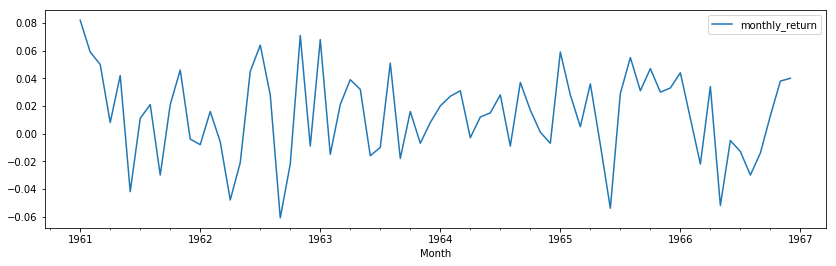

In [4]:
nyse.plot(figsize = (14,4))
import matplotlib.pyplot as plt
plt.show();

# Basic time series models

1. White Noise model
  - Fixed constant mean
  - Fixted constant variance
  - No correlation over time


2. Random Walk model
  - No specified mean or variance
  - Strong dependence over time

# Correlation and autocorrelation

## Correlation

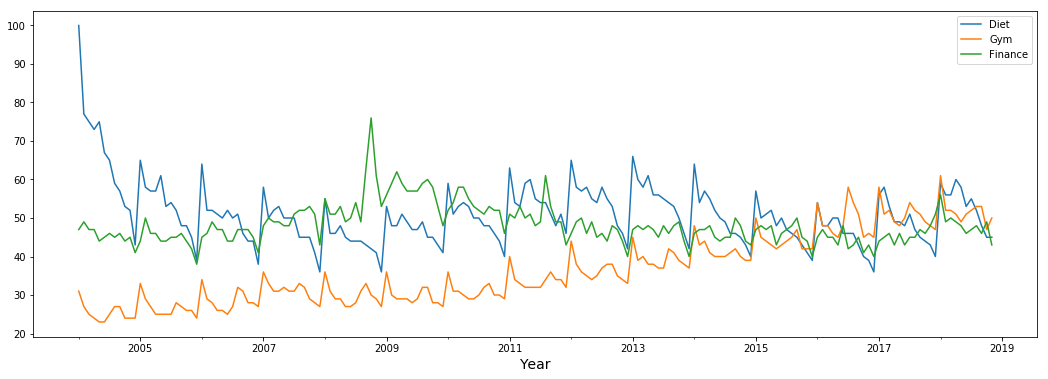

In [5]:
gtrends  =  pd.read_csv('google_trends.csv', skiprows=1)

gtrends.columns = ['Month', 'Diet', 'Gym', 'Finance']
gtrends.Month = pd.to_datetime(gtrends.Month)
gtrends.set_index('Month', inplace=True)

gtrends.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

In [6]:
gtrends.corr()

,Diet,Gym,Finance
Diet,1.000000,-0.050934,-0.026604
Gym,-0.050934,1.000000,-0.223186
Finance,-0.026604,-0.223186,1.000000


Make them **stationary**

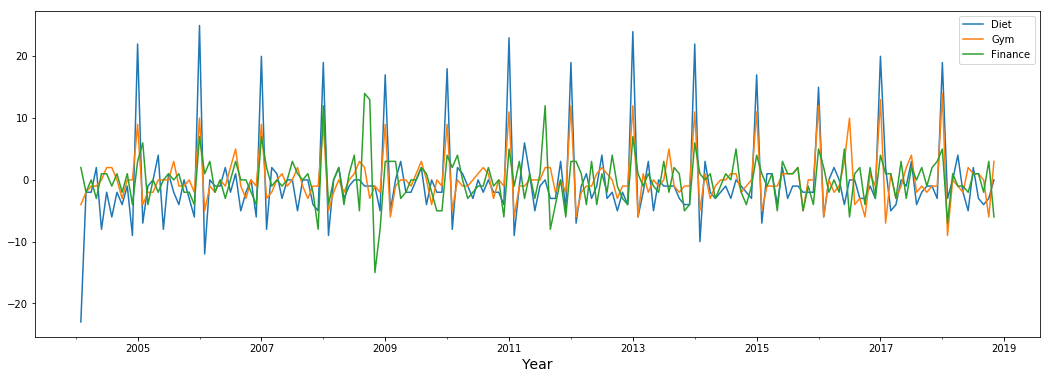

In [7]:
gtrends_diff = gtrends.diff(periods=1)
gtrends_diff.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

In [8]:
gtrends_diff.corr()

,Diet,Gym,Finance
Diet,1.000000,0.793339,0.395105
Gym,0.793339,1.000000,0.341564
Finance,0.395105,0.341564,1.000000


## Autocorrelation (ACF)

In [9]:
diet = gtrends[['Diet']]
diet_shift_12 = diet.shift(periods=12)
diet_shift_12.head()

,Diet
Month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,NaN
2004-04-01,NaN
2004-05-01,NaN


In [10]:
lag_12 = pd.concat([diet_shift_12, diet], axis=1)
lag_12.corr()

,Diet,Diet
Diet,1.000000,0.754955
Diet,0.754955,1.000000


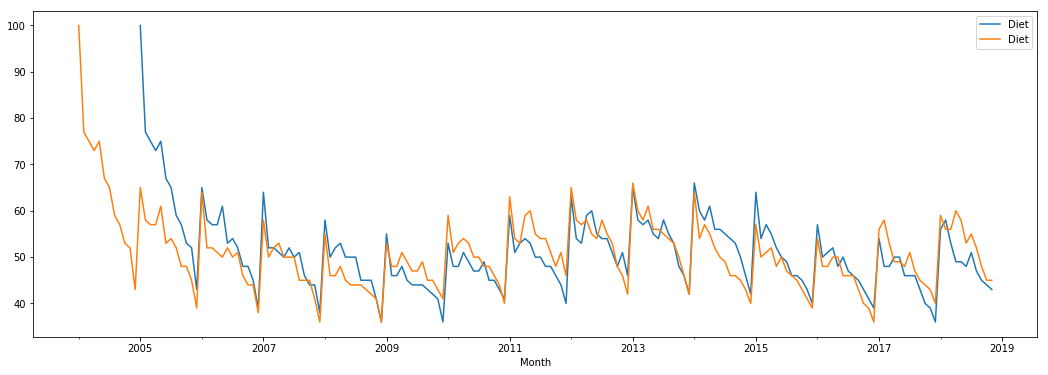

In [11]:
lag_12.plot(figsize=(18,6));

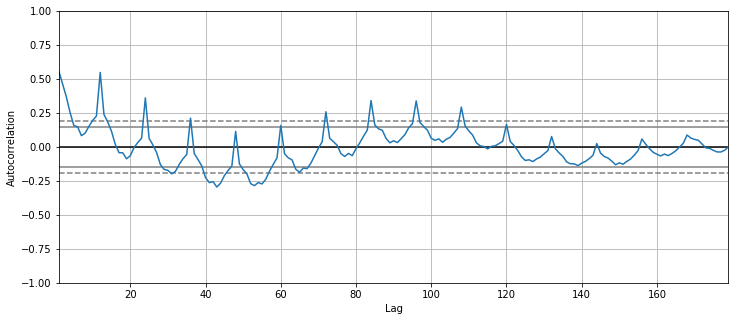

In [12]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(diet);

## Partial Autocorrelation (PACF)

D:\Software\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


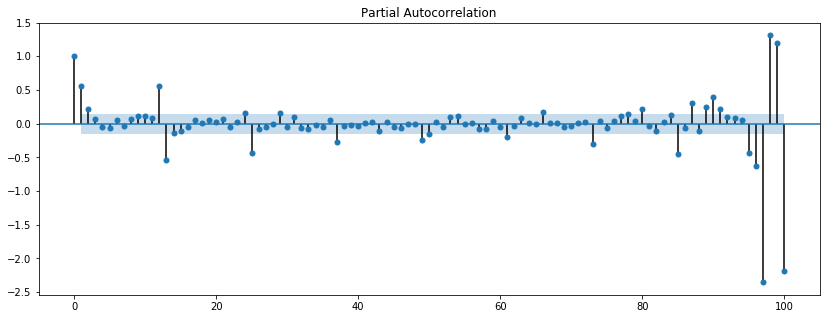

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(diet, lags = 100);

# ARMA Models

- Autoregressive model
- Moving Average model

## Autoregressive model

An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

## Moving average model

The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

$$ \text{Today = Mean + Noise + Slope} \times \text{yesterday's noise} $$

Or, mathematically:
$$\large Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$